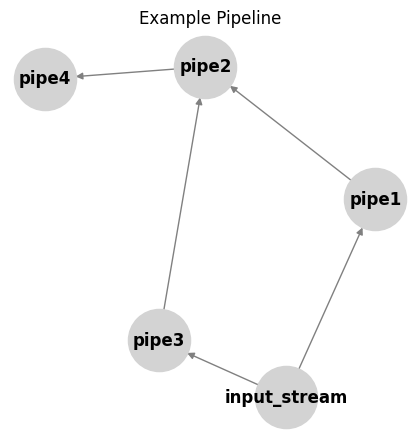

In [2]:
from plumber import Stream, Pipe, PipeLine

class ExampleStream(Stream):
    def __init__(self, label: str) -> None:
        super().__init__(label)
        
        self.data[label] = "hi"

class ExamplePipe(Pipe):
    def __init__(self, label: str) -> None:
        super().__init__(label)

    def pipe(self, inputs):
        return str(inputs.keys())

input_stream = ExampleStream('input_stream')

pipe1 = ExamplePipe('pipe1')
pipe2 = ExamplePipe('pipe2')
pipe3 = ExamplePipe('pipe3')
pipe4 = ExamplePipe('pipe4')


PL = PipeLine()

PL.register(input_stream, pipe1)
PL.register(input_stream, pipe3)

PL.register(pipe1, pipe2)
PL.register(pipe3, pipe2)
PL.register(pipe2, pipe4)
PL.flow(input_stream)

PL.plot(title="Example Pipeline")